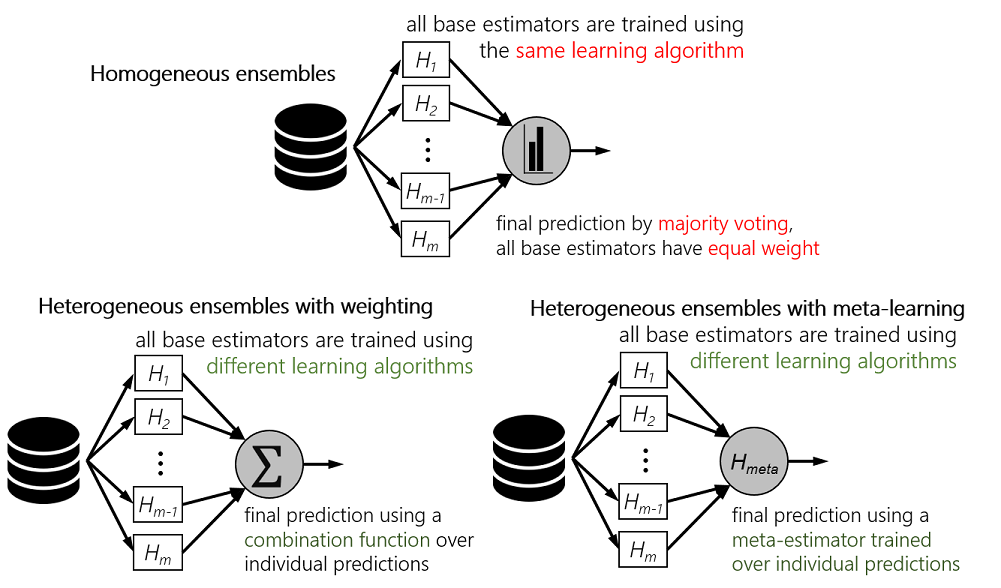

Há basicamente duas formas de ensembles heterogêneos:

1.   Baseados em peso: as previsões individuais dos estimadores base possuem  pesos que correspondem à qualidade do estimador;
2.   Meta-learning: usa um modelo de aprendizagem para combinar as previsões dos estimadores; as previsões individuais dos estimadores base são tratadas como metadados e passadas para um meta-learner que é treinado para fazer as previsões finais.



In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X,y = make_moons(600,noise=0.25, random_state=13)
X,Xval,y,yval = train_test_split(X,y,test_size=0.25)
Xtrn, Xtst,ytrn,ytst = train_test_split(X,y,test_size=0.25)

# Treinando Modelos Base

Text(0, 0.5, 'X2')

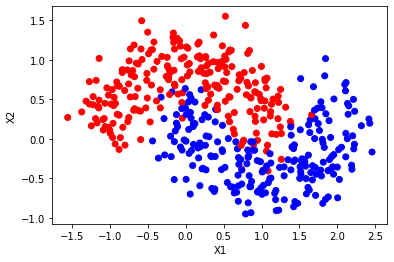

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm_bright = ListedColormap(["#FF0000", "#0000FF"])
plt.scatter(X[:,0], X[:,1],c=y, cmap=cm_bright)
plt.xlabel('X1')
plt.ylabel('X2')


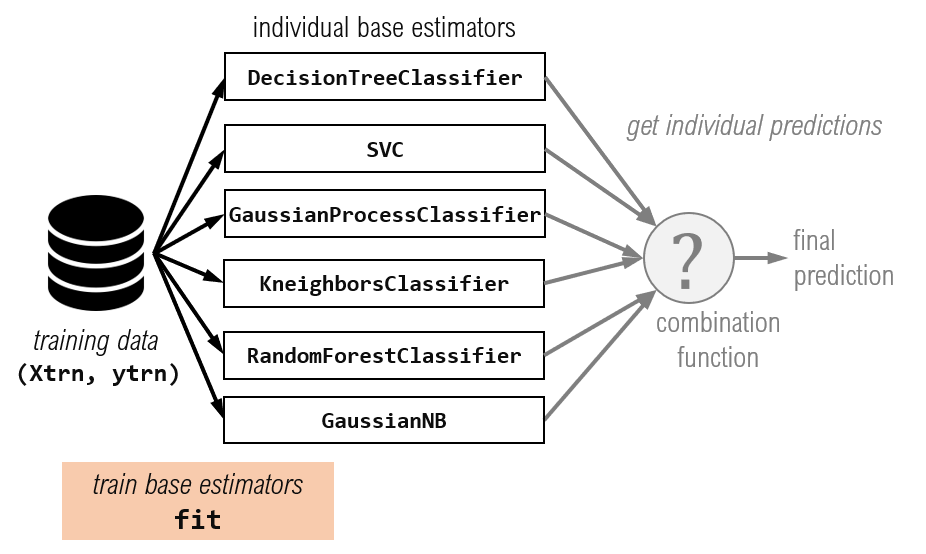

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

estimators = [('dt', DecisionTreeClassifier(max_depth=5)),
              ('svm', SVC(probability=True)),
              ('gp', GaussianProcessClassifier(RBF(1.0))),
              ('3nn', KNeighborsClassifier(n_neighbors=3)),
              ('rf',RandomForestClassifier(max_depth=3,n_estimators=25)),
              ('gnb', GaussianNB())]

def fit(estimators, X, y):
  for model, estimator in estimators:
    estimator.fit(X, y)

  return estimators

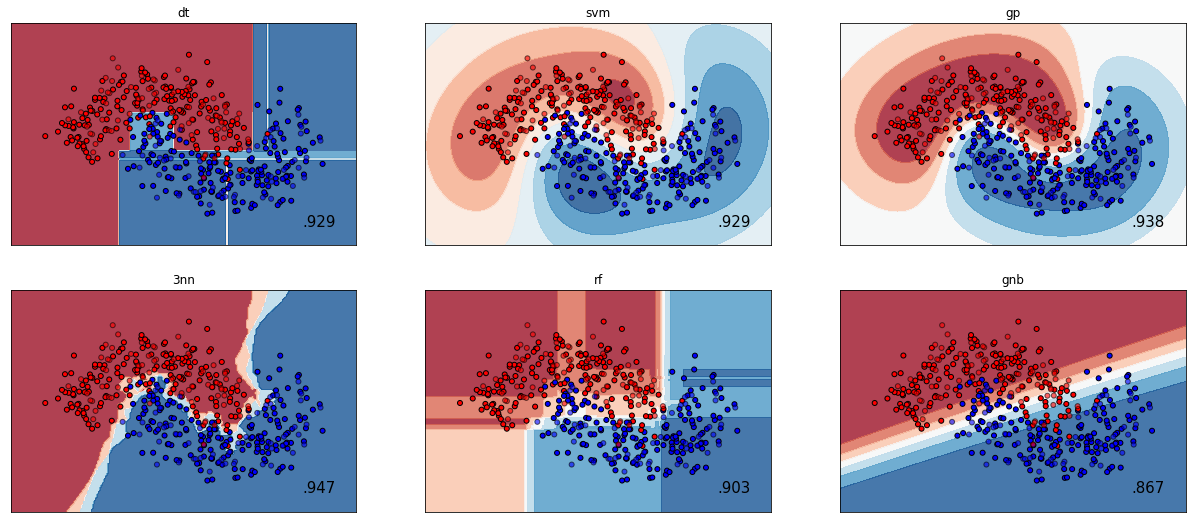

In [ ]:
import numpy as np

h = 0.02

figure = plt.figure(figsize=(17, 9))

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax = plt.subplot(1, len(estimators) + 1, 1)

# Plot the training points
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
# and testing points
ax.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, cmap=cm_bright, alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

i=1
# iterate over classifiers
for name, clf in estimators:
  ax = plt.subplot(2, 3, i)
  clf.fit(Xtrn, ytrn)
  score = clf.score(Xtst, ytst)

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max] x [y_min, y_max].
  if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
  else:
    Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

  # Plot also the training points
  ax.scatter(Xtrn[:, 0], Xtrn[:, 1], c=ytrn, cmap=cm_bright, edgecolors="black", s=25,)
  # and testing points
  ax.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, cmap=cm_bright, alpha=0.6, edgecolors="black", s=25,)

  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(name)
  ax.text(xx.max() - 0.3, yy.min() + 0.3, f"{score:.3f}".lstrip("0"), size=15, horizontalalignment="right",)
  i += 1

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()

## Previsões Individuais dos Modelos

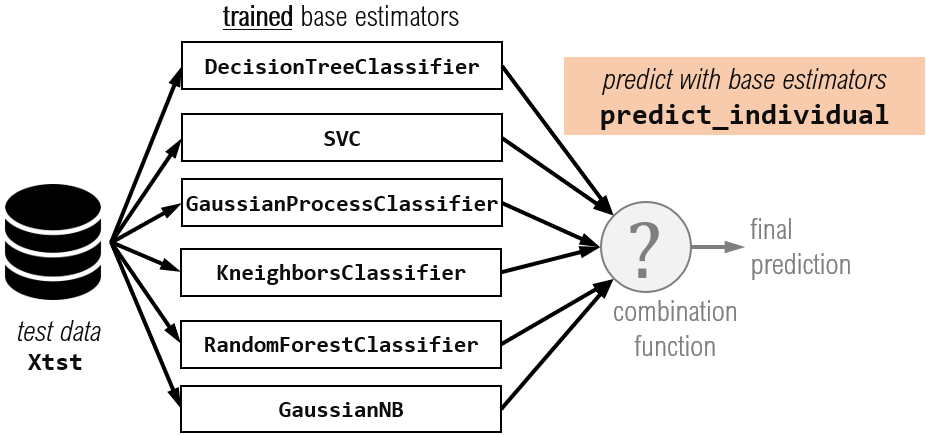

In [ ]:
def predict_individual(X, estimators, proba=False):
  n_estimators = len(estimators)
  n_samples = X.shape[0]

  y = np.zeros((n_samples, n_estimators))
  for i, (model, estimator) in enumerate(estimators):
    if proba:
      y[:,i] = estimator.predict_proba(X)[:,1]
    else:
      y[:,i] = estimator.predict(X)
  return y

In [ ]:
y_individual = predict_individual(Xtst, estimators, proba=False)
y_individual

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1.],
       [1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0.

In [ ]:
y_individual = predict_individual(Xtst, estimators, proba=True)
np.set_printoptions(precision=2)
y_individual

array([[0.00e+00, 5.83e-03, 8.29e-02, 0.00e+00, 1.72e-01, 2.64e-01],
       [0.00e+00, 5.41e-02, 1.58e-01, 0.00e+00, 1.09e-01, 3.67e-02],
       [1.00e+00, 8.63e-01, 7.65e-01, 6.67e-01, 7.77e-01, 8.75e-01],
       [9.82e-01, 9.93e-01, 9.06e-01, 1.00e+00, 9.89e-01, 9.98e-01],
       [0.00e+00, 8.88e-02, 2.36e-01, 3.33e-01, 2.19e-01, 3.48e-02],
       [9.68e-02, 1.84e-01, 3.30e-01, 0.00e+00, 2.81e-01, 2.49e-01],
       [1.00e+00, 9.89e-01, 9.18e-01, 1.00e+00, 8.43e-01, 9.92e-01],
       [8.15e-01, 4.43e-01, 5.43e-01, 6.67e-01, 2.94e-01, 1.19e-01],
       [9.82e-01, 9.87e-01, 9.40e-01, 1.00e+00, 9.89e-01, 9.95e-01],
       [9.68e-02, 6.61e-03, 6.58e-02, 0.00e+00, 2.30e-01, 2.57e-01],
       [1.00e+00, 9.92e-01, 9.12e-01, 1.00e+00, 8.43e-01, 9.98e-01],
       [0.00e+00, 7.90e-03, 7.15e-02, 0.00e+00, 1.86e-01, 5.59e-03],
       [0.00e+00, 2.37e-02, 1.13e-01, 0.00e+00, 9.52e-02, 1.30e-02],
       [9.82e-01, 9.83e-01, 9.23e-01, 1.00e+00, 8.36e-01, 9.97e-01],
       [0.00e+00, 4.15e-03, 6.93e-

# Combinando previsões por pesos

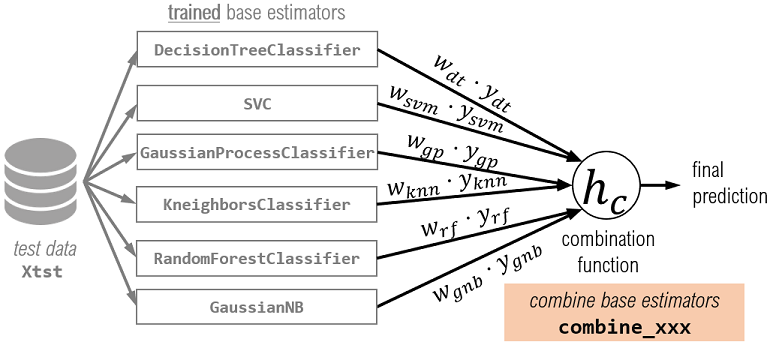

Essa abordagem consiste em duas etapas:

1.   Atribuir pesos ($w_{\text{clf}}$) para cada classificador (clf) refletindo sua importância;
2.   Combinar as previsões ponderadas ($w_{\text{clf}}\cdot y_{\text{clf}}$) usando uma função de combinação $h_c$.

## Voto Majoritário

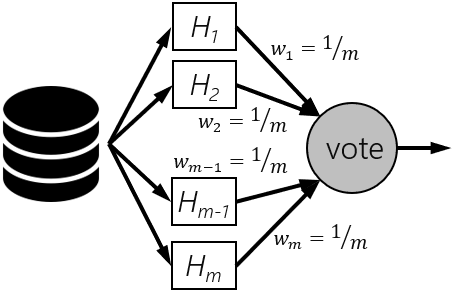

É um caso especial a combinação por pesos. Para $m$ estimadores base, cada estimador tem peso $w_{\text{clf}}=\frac{1}{m}$ e $h_c$ é equivalente ao voto majoritário (moda).

In [ ]:
from scipy.stats import mode

def combine_using_majority_vote(X, estimators):
  y_individual = predict_individual(X, estimators, proba=False)
  y_final = mode(y_individual, axis=1)
  return y_final[0].reshape(-1,)

In [ ]:
from sklearn.metrics import accuracy_score

ypred = combine_using_majority_vote(Xtst, estimators)
tst_acc = accuracy_score(ytst, ypred)
tst_acc


0.9380530973451328

## Pesos baseados na Acurácia

O peso do t-ésimo classificador é dado por:

$w_t=\frac{\alpha_t}{\sum_{t=1}^{m}\alpha_t}$,

onde $\alpha_t$ é a acurácia do t-ésimo classificador no conjunto de validação.

A previsão final pode ser calculada como como a soma ponderada das previsões individuais:

$y_{\text{final}}=w_1y_1+w_2y_2+\ldots+w_my_m=\sum_{t=1}^m w_ty_t$

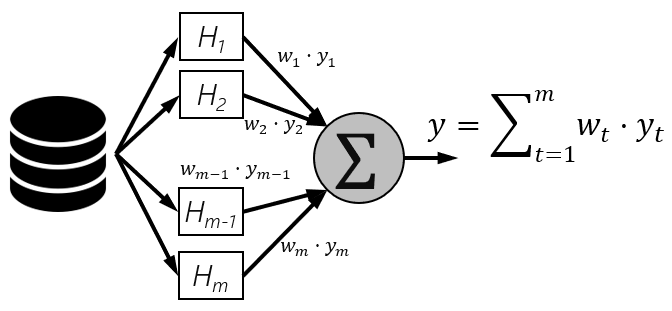

In [ ]:
def combine_using_accuracy_weighting(X, estimators, Xval, yval):
  n_estimators = len(estimators)
  yval_individual = predict_individual(Xval, estimators, proba=False)
  wts = [accuracy_score(yval, yval_individual[:, i]) for i in range(n_estimators)]
  wts /= np.sum(wts)
  ypred_individual = predict_individual(X, estimators, proba=False)
  y_final = np.dot(ypred_individual, wts)
  return np.round(y_final)

In [ ]:
ypred = combine_using_accuracy_weighting(Xtst,estimators,Xval,yval)
tst_acc = accuracy_score(ytst,ypred)
tst_acc

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0.

0.9380530973451328

# Metalearning: Stacking



1.   Nível 1: treina estimadores base nos dados de treino;
2.   Nível 2: constrói um novo conjunto de dados a partir da saída dos classificadores, que se toram *meta-features* (classes previstas ou probabilidades).



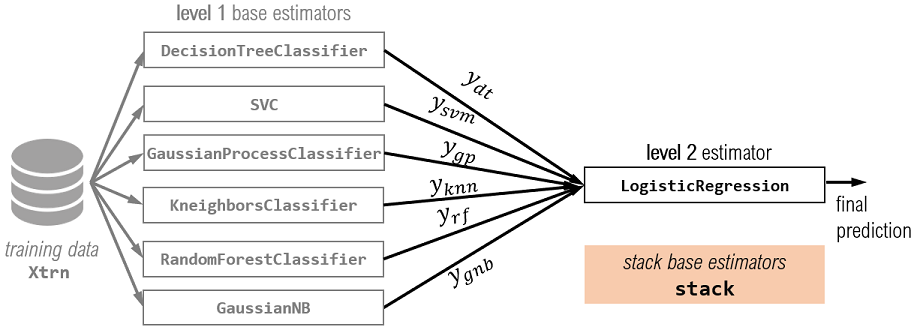

In [ ]:
def fit_stacking(level1_estimators, level2_estimator, X, y, use_proba=False):

  fit(level1_estimators,X,y)
  X_meta = predict_individual(X,estimators=level1_estimators,proba=use_proba)
  level2_estimator.fit(X_meta,y)
  final_model={'level-1':level1_estimators,
               'level-2':level2_estimator,
               'use-proba': use_proba}
  return final_model

In [ ]:
def predict_stacking(X, stacked_model):
  level1_estimators = stacked_model['level-1']
  use_probabilities = stacked_model['use-proba']
  X_meta = predict_individual(X, estimators=level1_estimators,
  proba=use_probabilities) #B
  level2_estimator = stacked_model['level-2']
  y = level2_estimator.predict(X_meta) #C
  return y

In [ ]:
from sklearn.linear_model import LogisticRegression
meta_estimator = LogisticRegression()
stacking_model = fit_stacking(estimators,meta_estimator,Xtrn,ytrn,use_proba=True)
ypred = predict_stacking(Xtst,stacking_model)
tst_acc = accuracy_score(ytst,ypred)
tst_acc

0.911504424778761

In [ ]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(Xtrn, ytrn).score(Xtst, ytst)

0.9203539823008849